In [5]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from mpl_toolkits.mplot3d import axes3d

## Как устроены размеры пересечений?

In [9]:
def draw_heatmap_intersections(fname):
    plot_tl = ' '.join(fname.split('.')[0].split('_')[2:6:3])
    df = pd.read_table(fname, header=None).rename(columns={0:"DNA_int", 1:"RNA_int"})
    names = sorted(set([name for name in [*df["DNA_int"], *df["RNA_int"]]]))
    data = [[0]*len(names) for _ in range(len(names))]
    y = pd.DataFrame(data=data, columns=names, index=names)
    for row in tqdm(df.iterrows()):
        dna_int, rna_int = row[1]["DNA_int"], row[1]["RNA_int"]
        y[dna_int][rna_int] += 1

    plt.figure(figsize=(20,15))
    ax = sns.heatmap(y, vmax=200, cmap="GnBu")
    ax.set_xlabel('DNA intersection', fontsize = 30)
    ax.set_ylabel('RNA intersection', fontsize = 30)
#    plt.title(plot_tl)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([])
    plt.show()
    
    return y

0it [00:00, ?it/s]

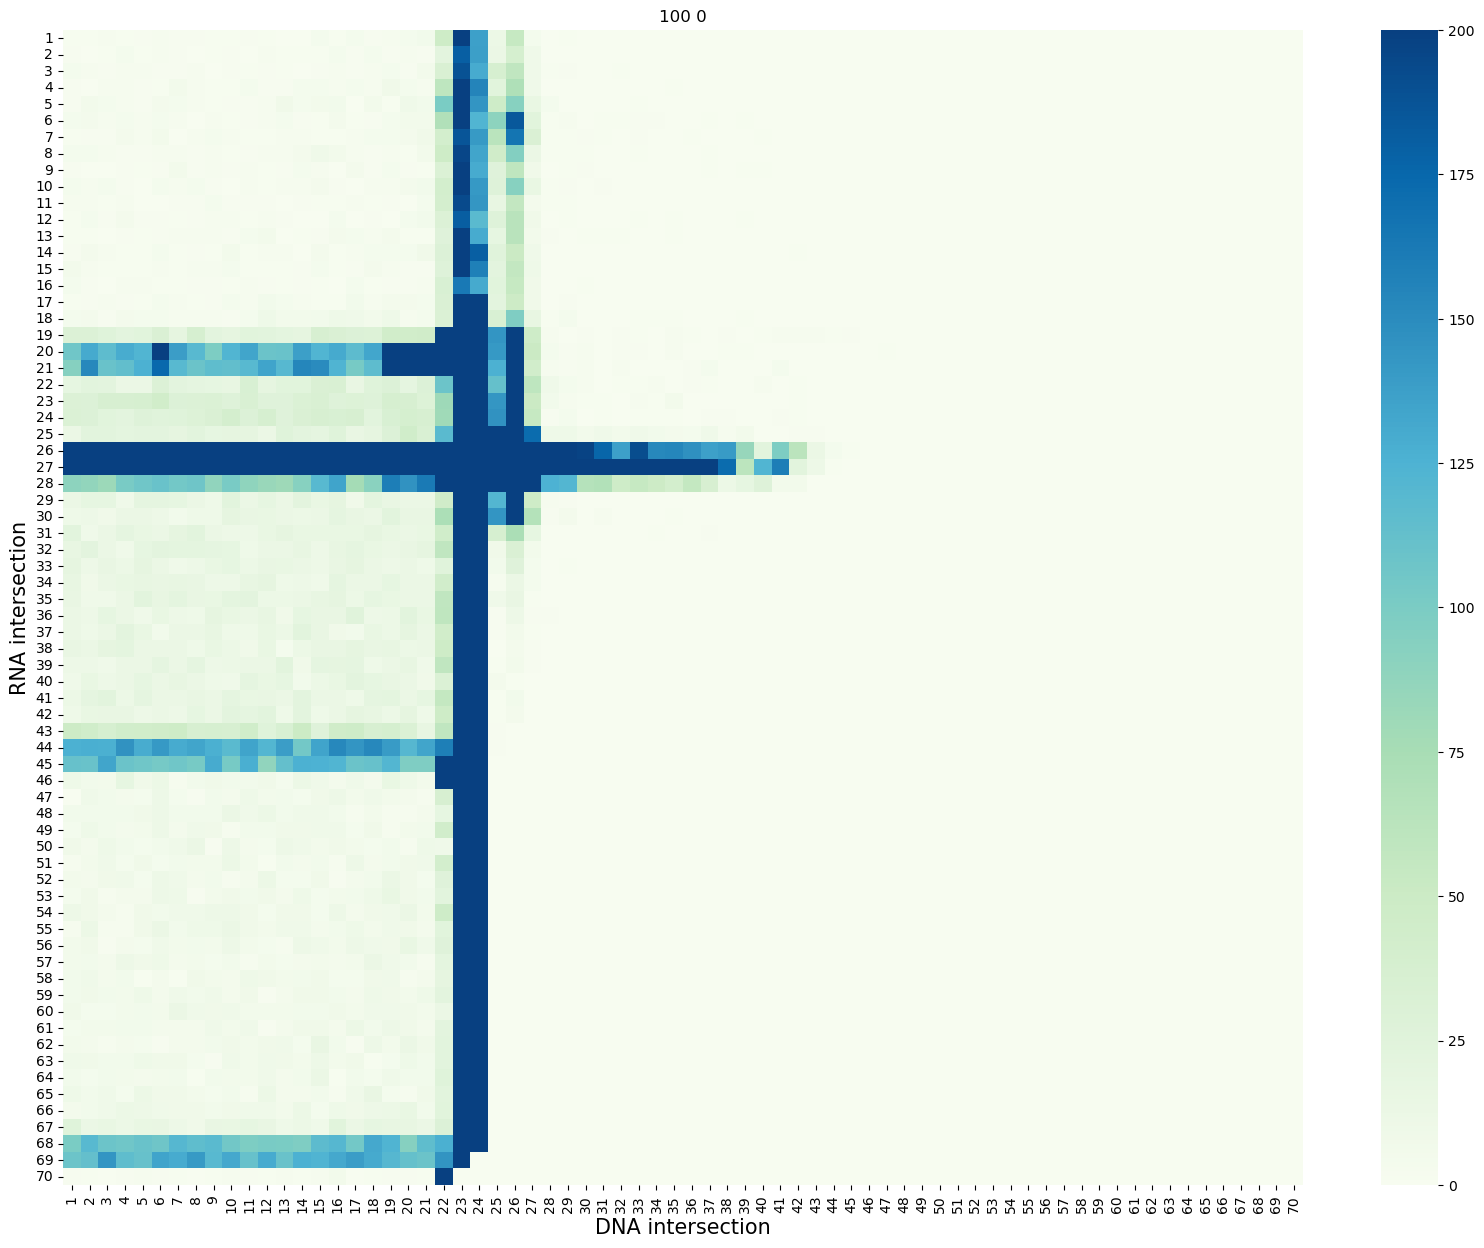

0it [00:00, ?it/s]

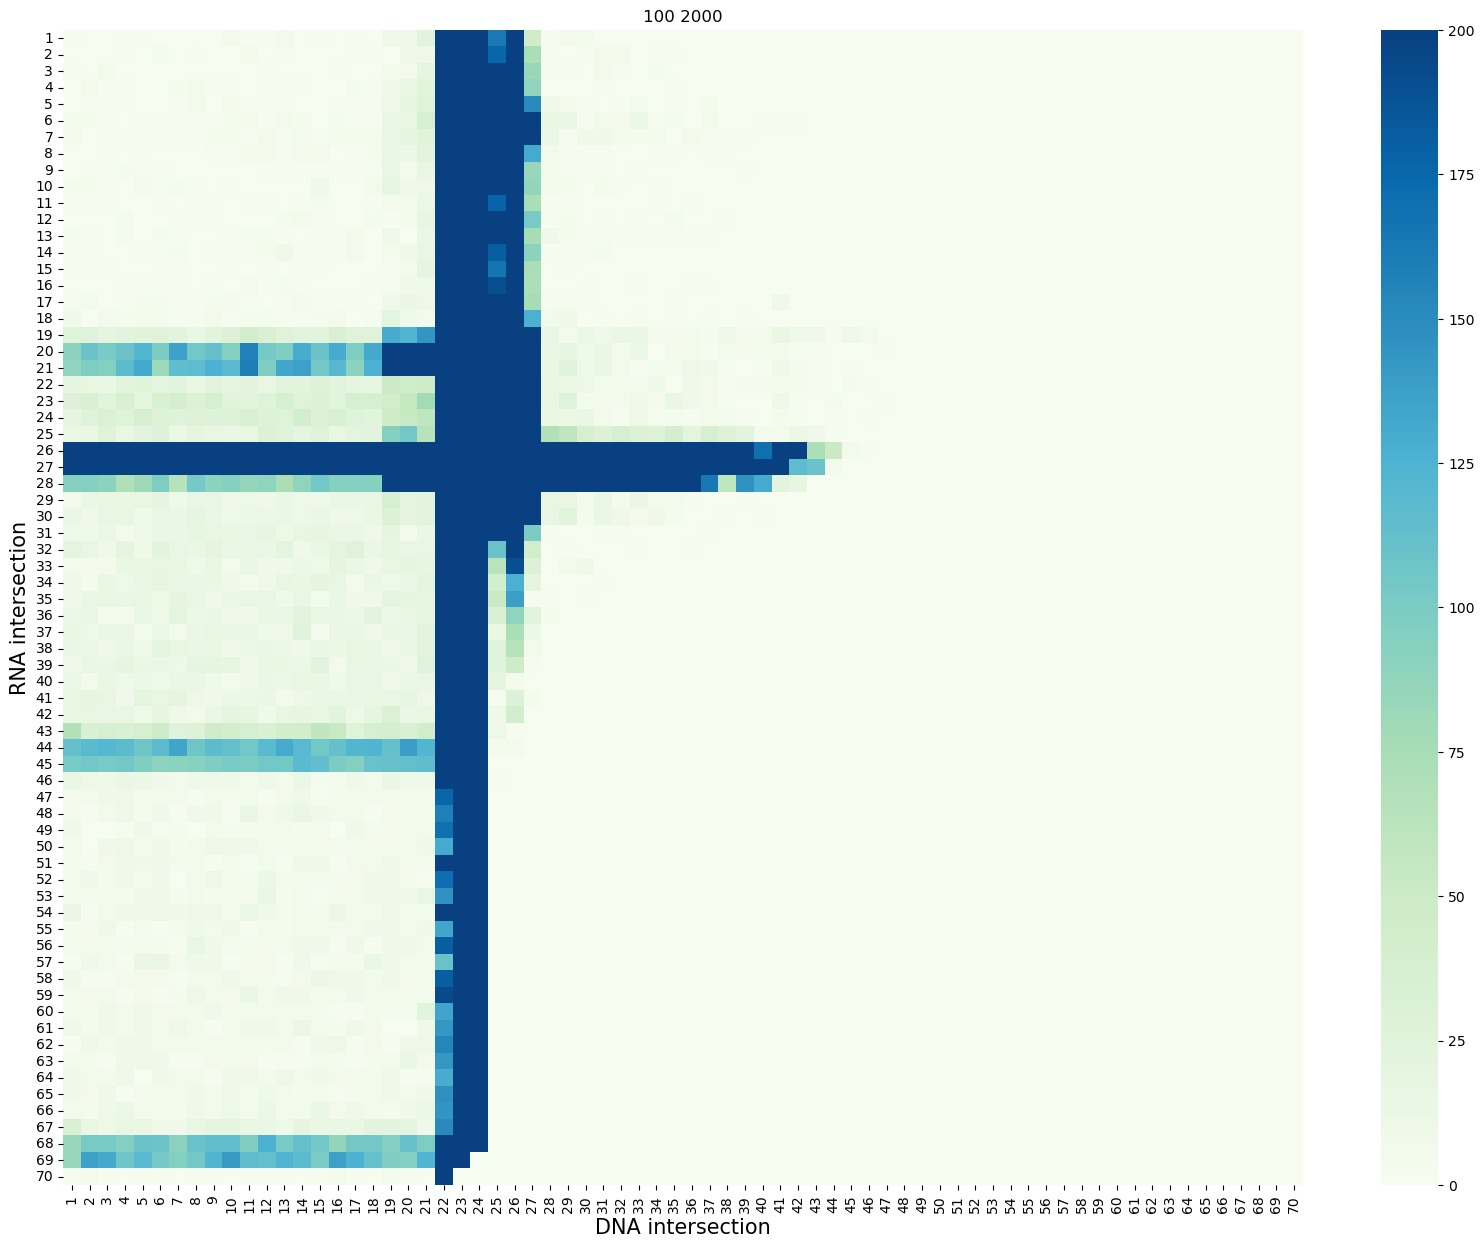

0it [00:00, ?it/s]

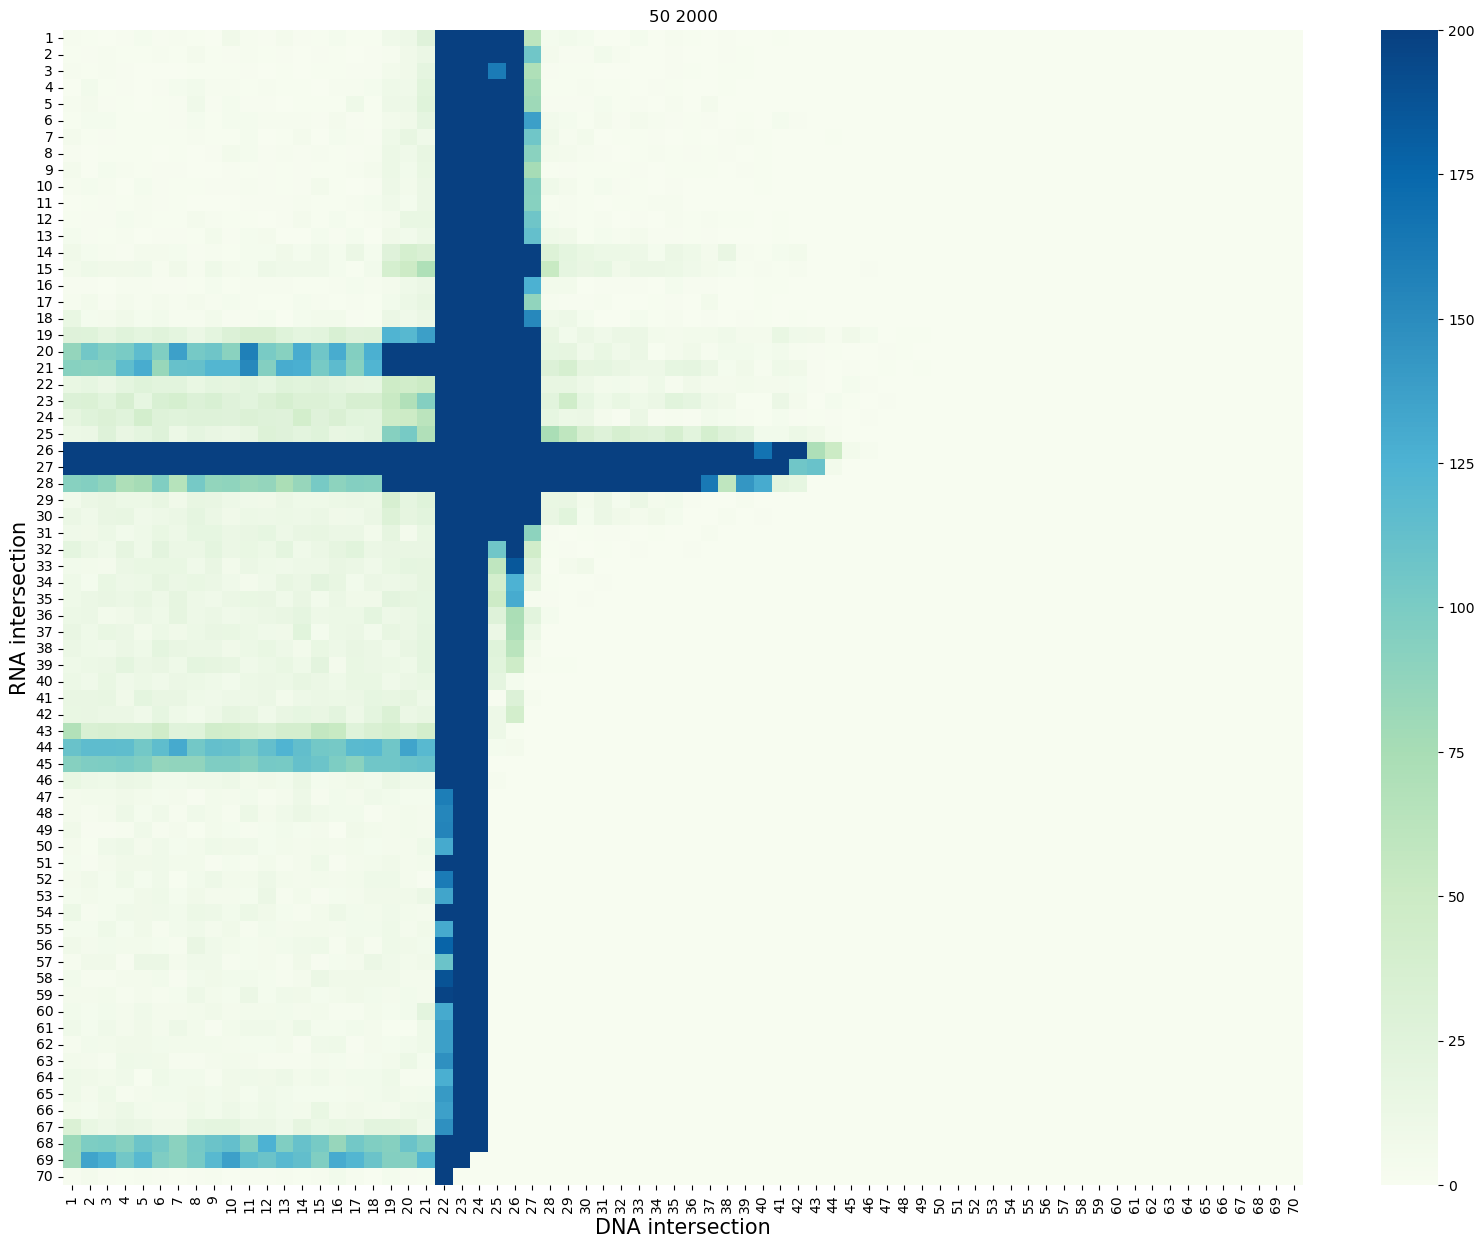

0it [00:00, ?it/s]

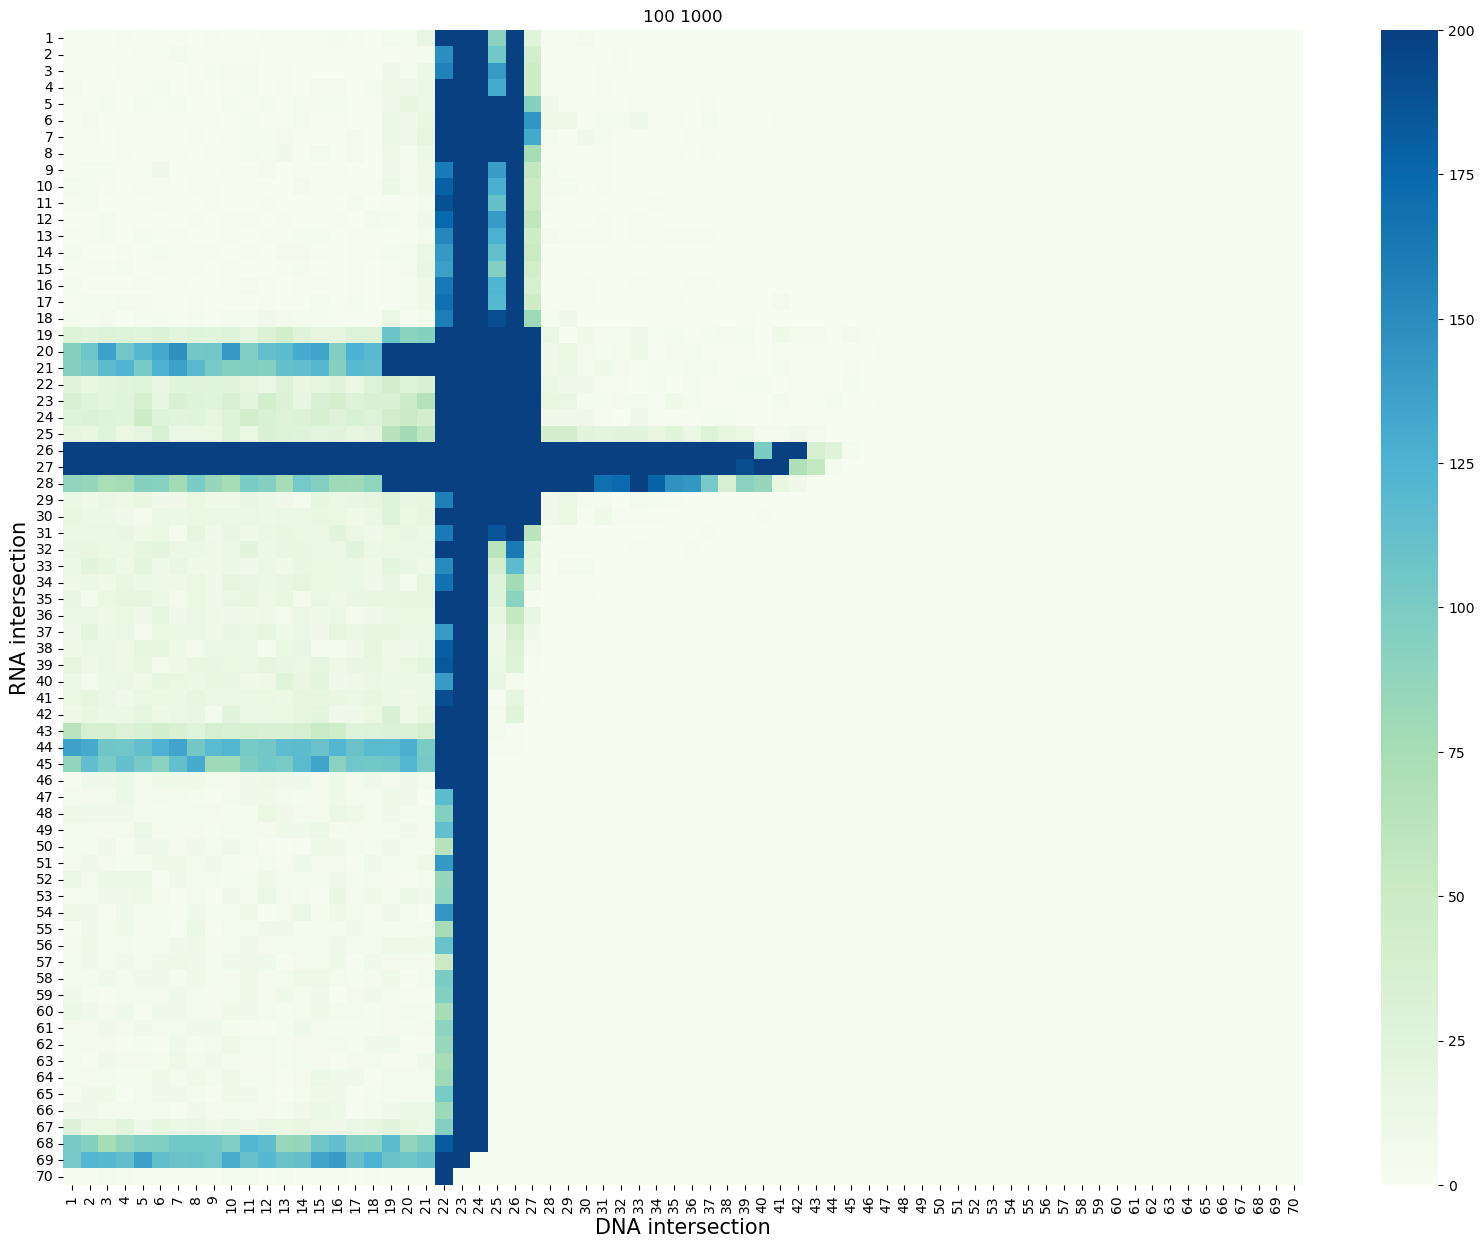

0it [00:00, ?it/s]

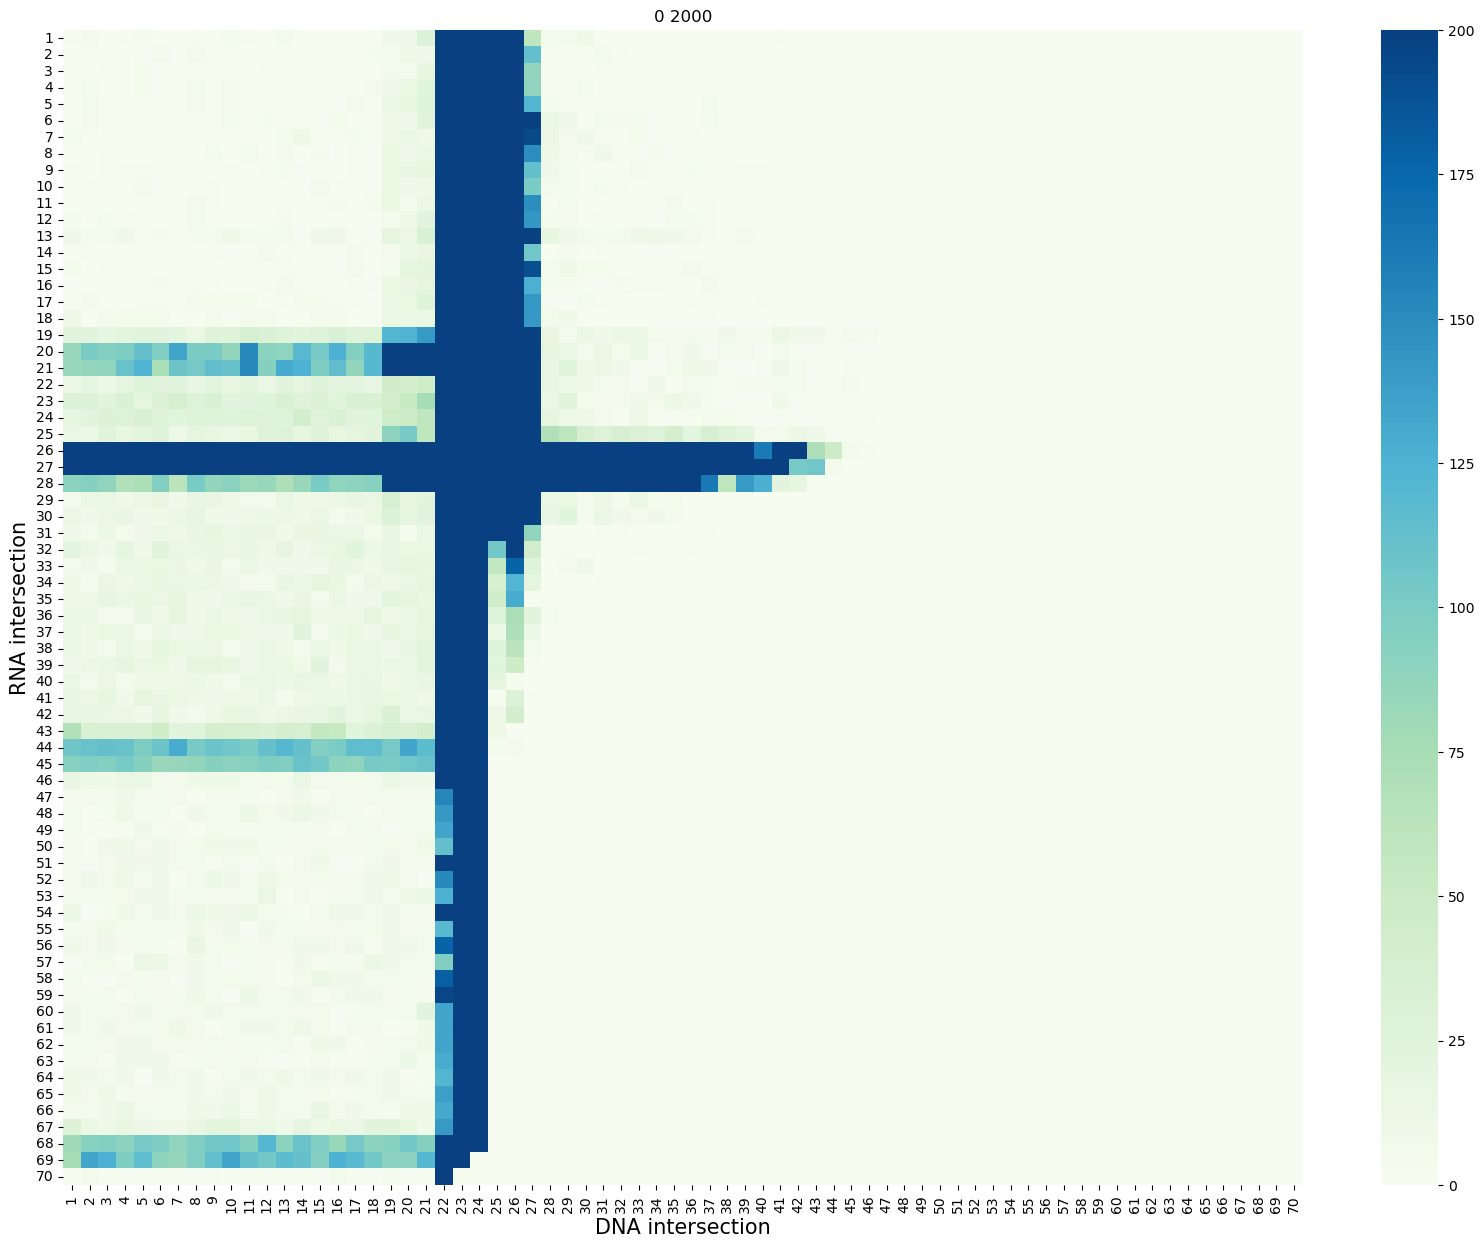

0it [00:00, ?it/s]

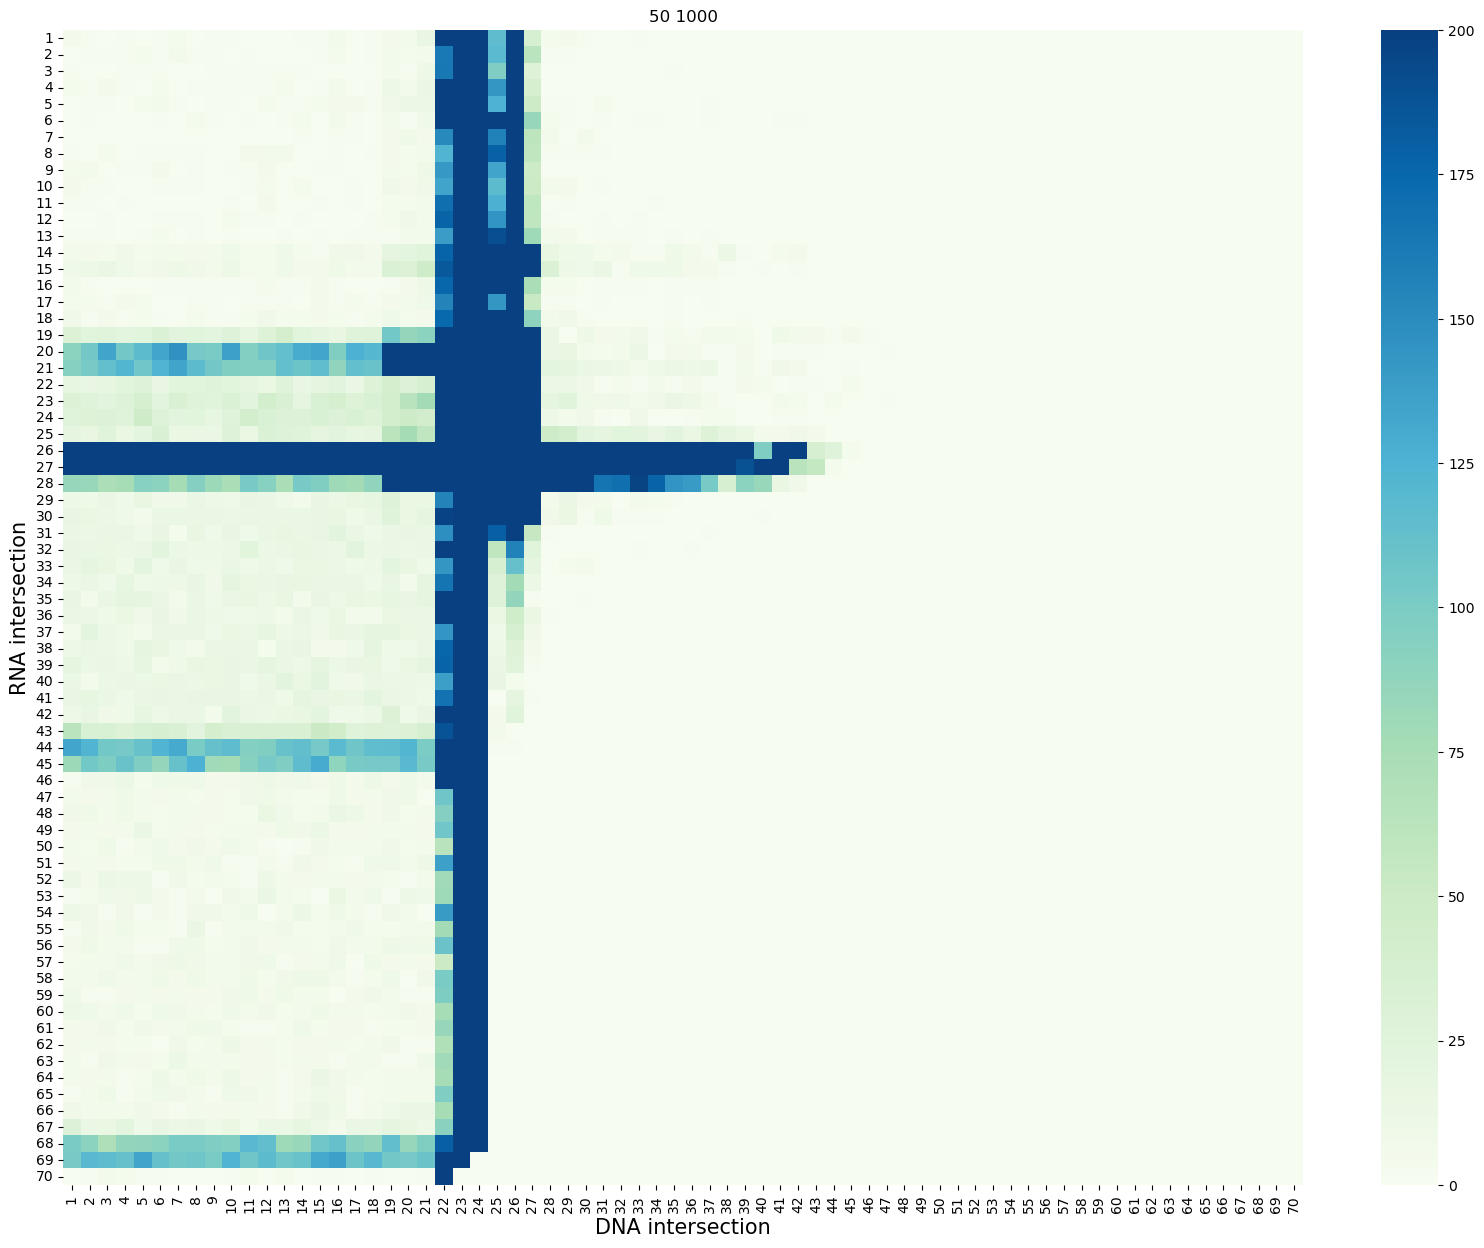

0it [00:00, ?it/s]

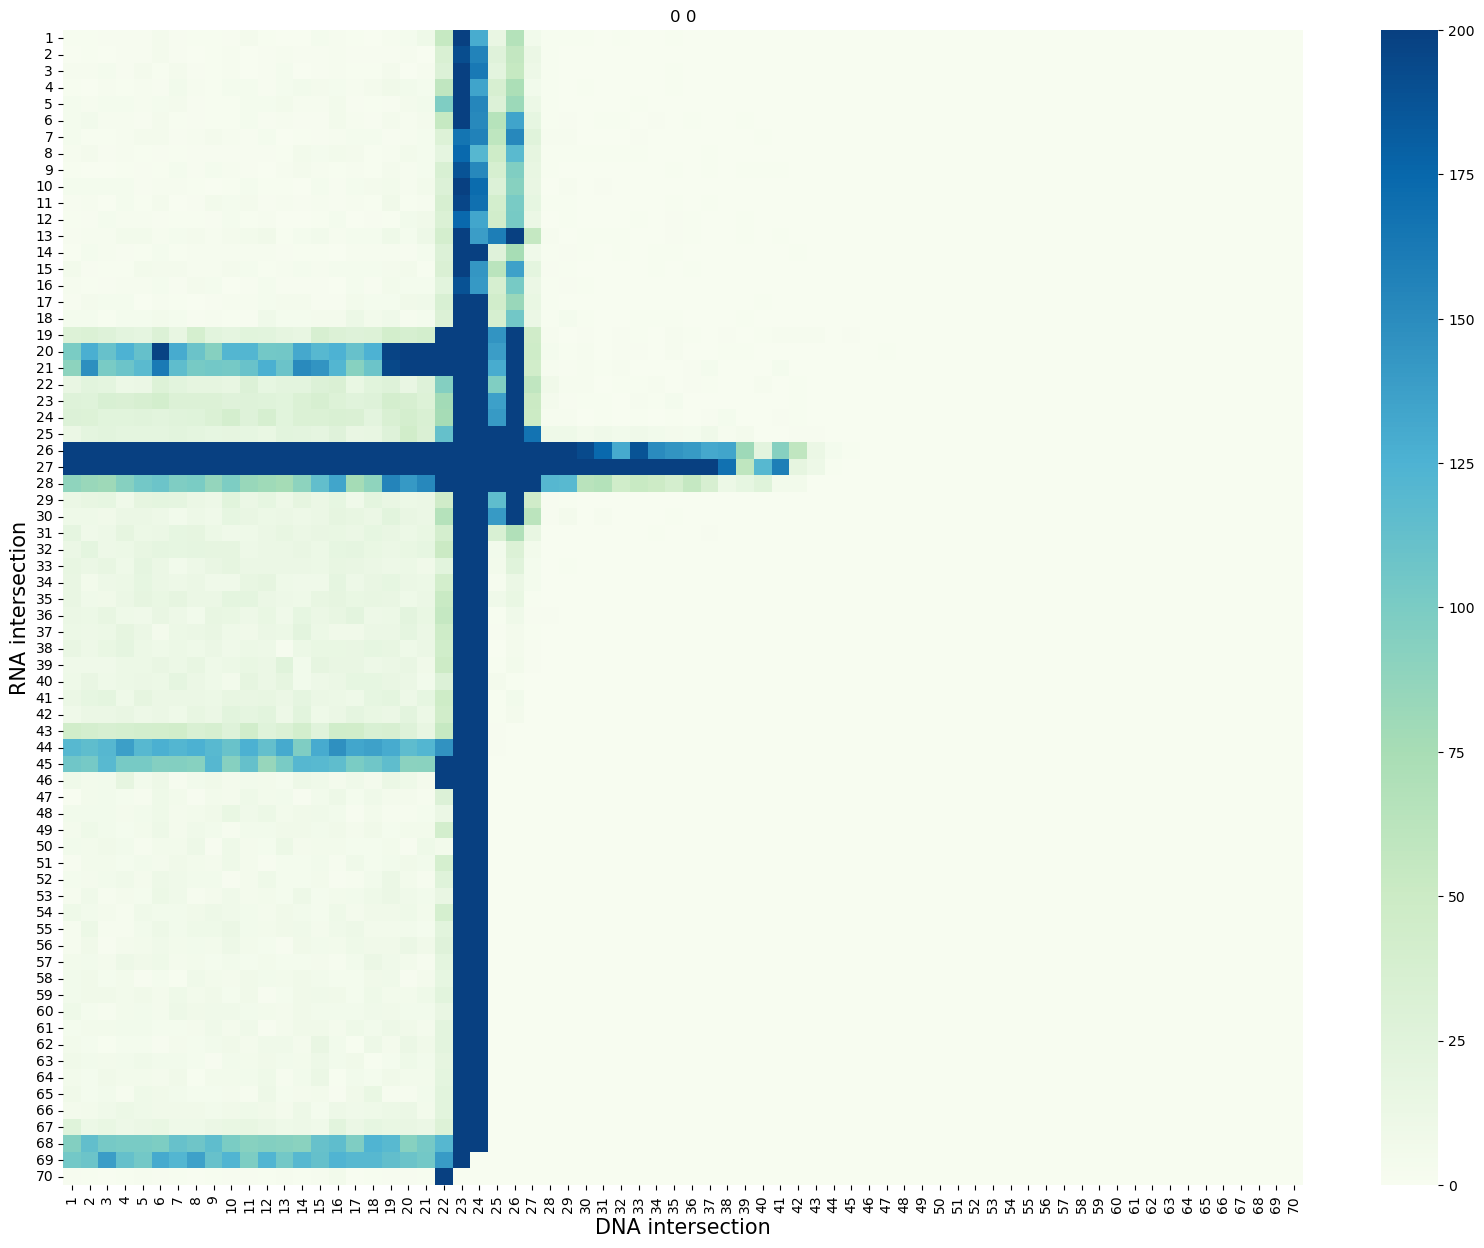

0it [00:00, ?it/s]

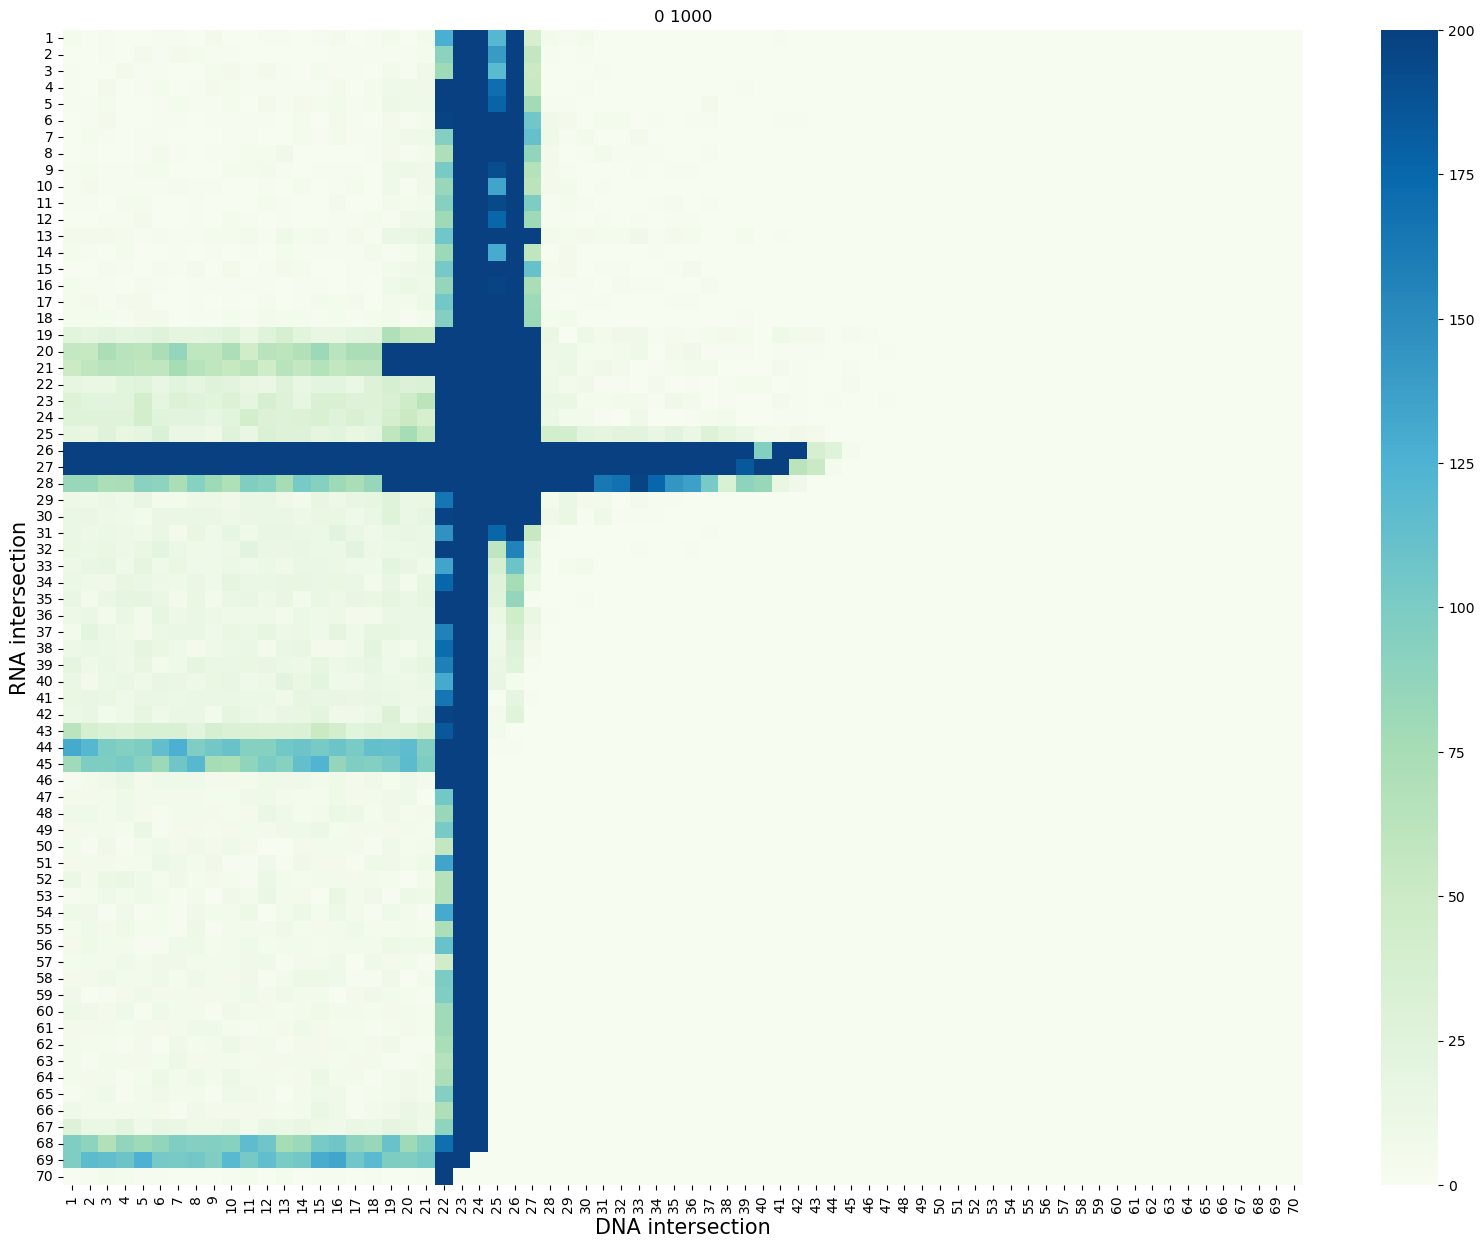

0it [00:00, ?it/s]

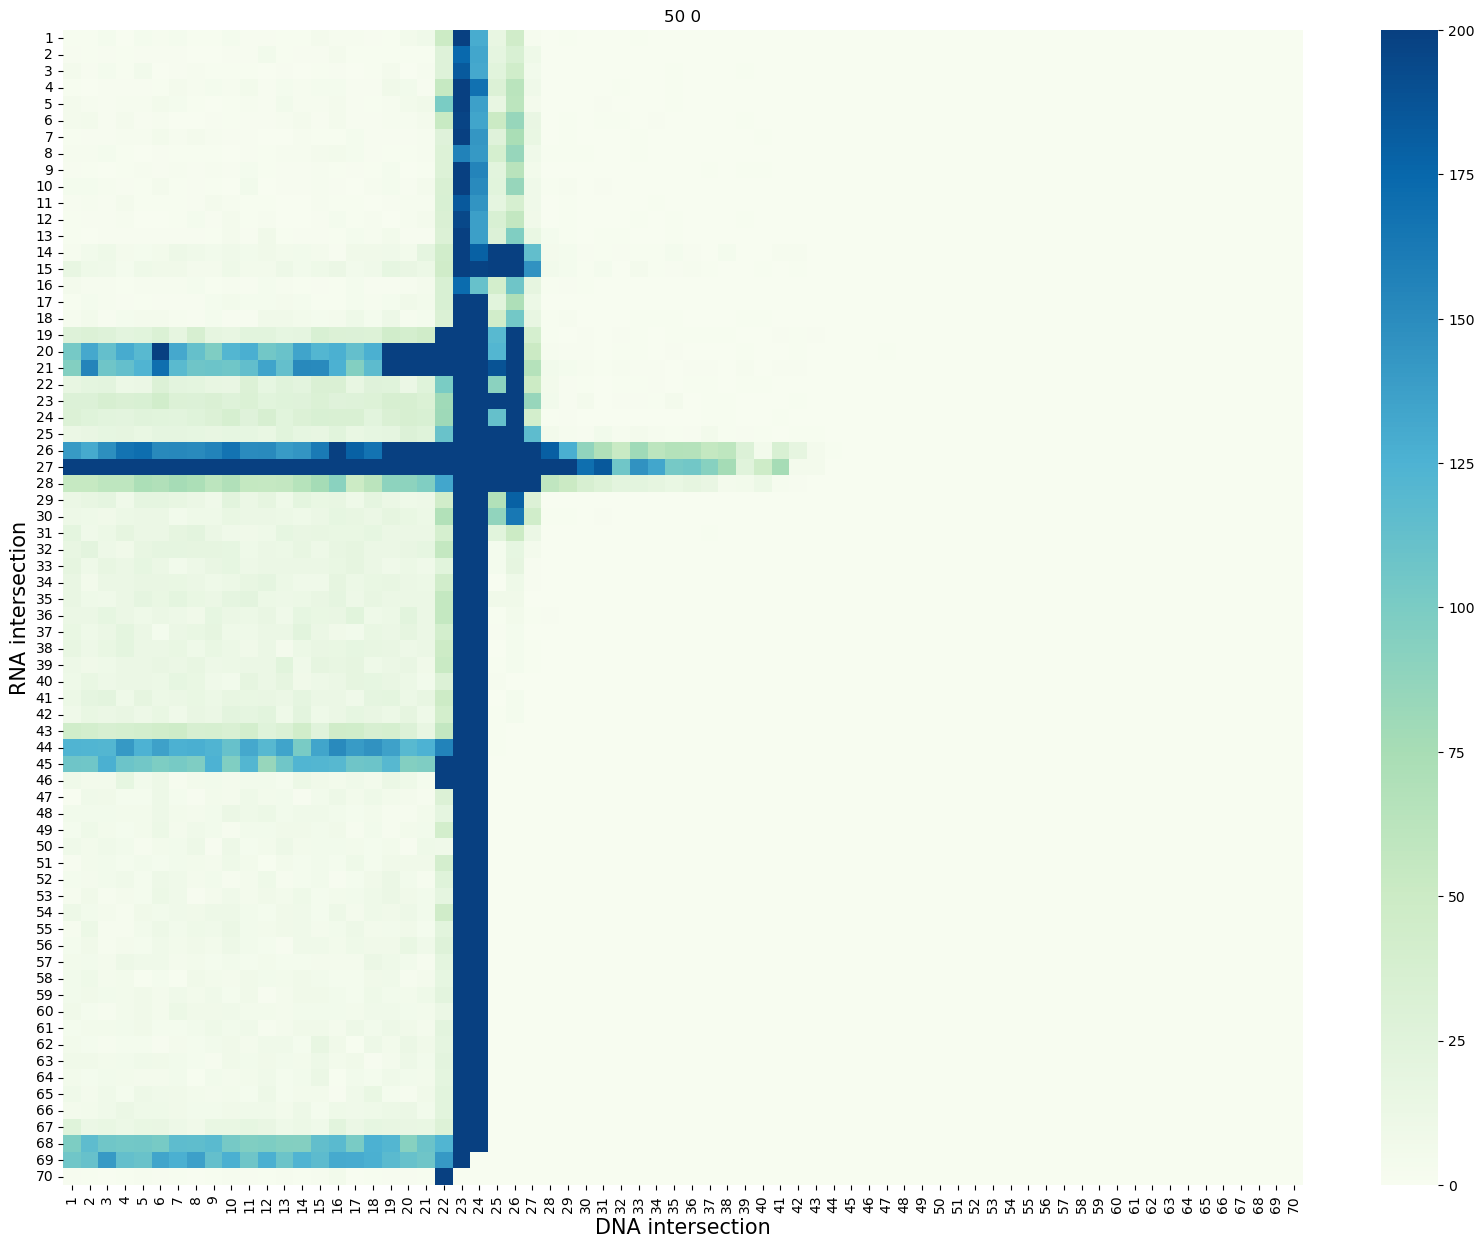

In [3]:
for file in glob.glob("*tsv"):
        draw_heatmap_intersections(file)

0it [00:00, ?it/s]

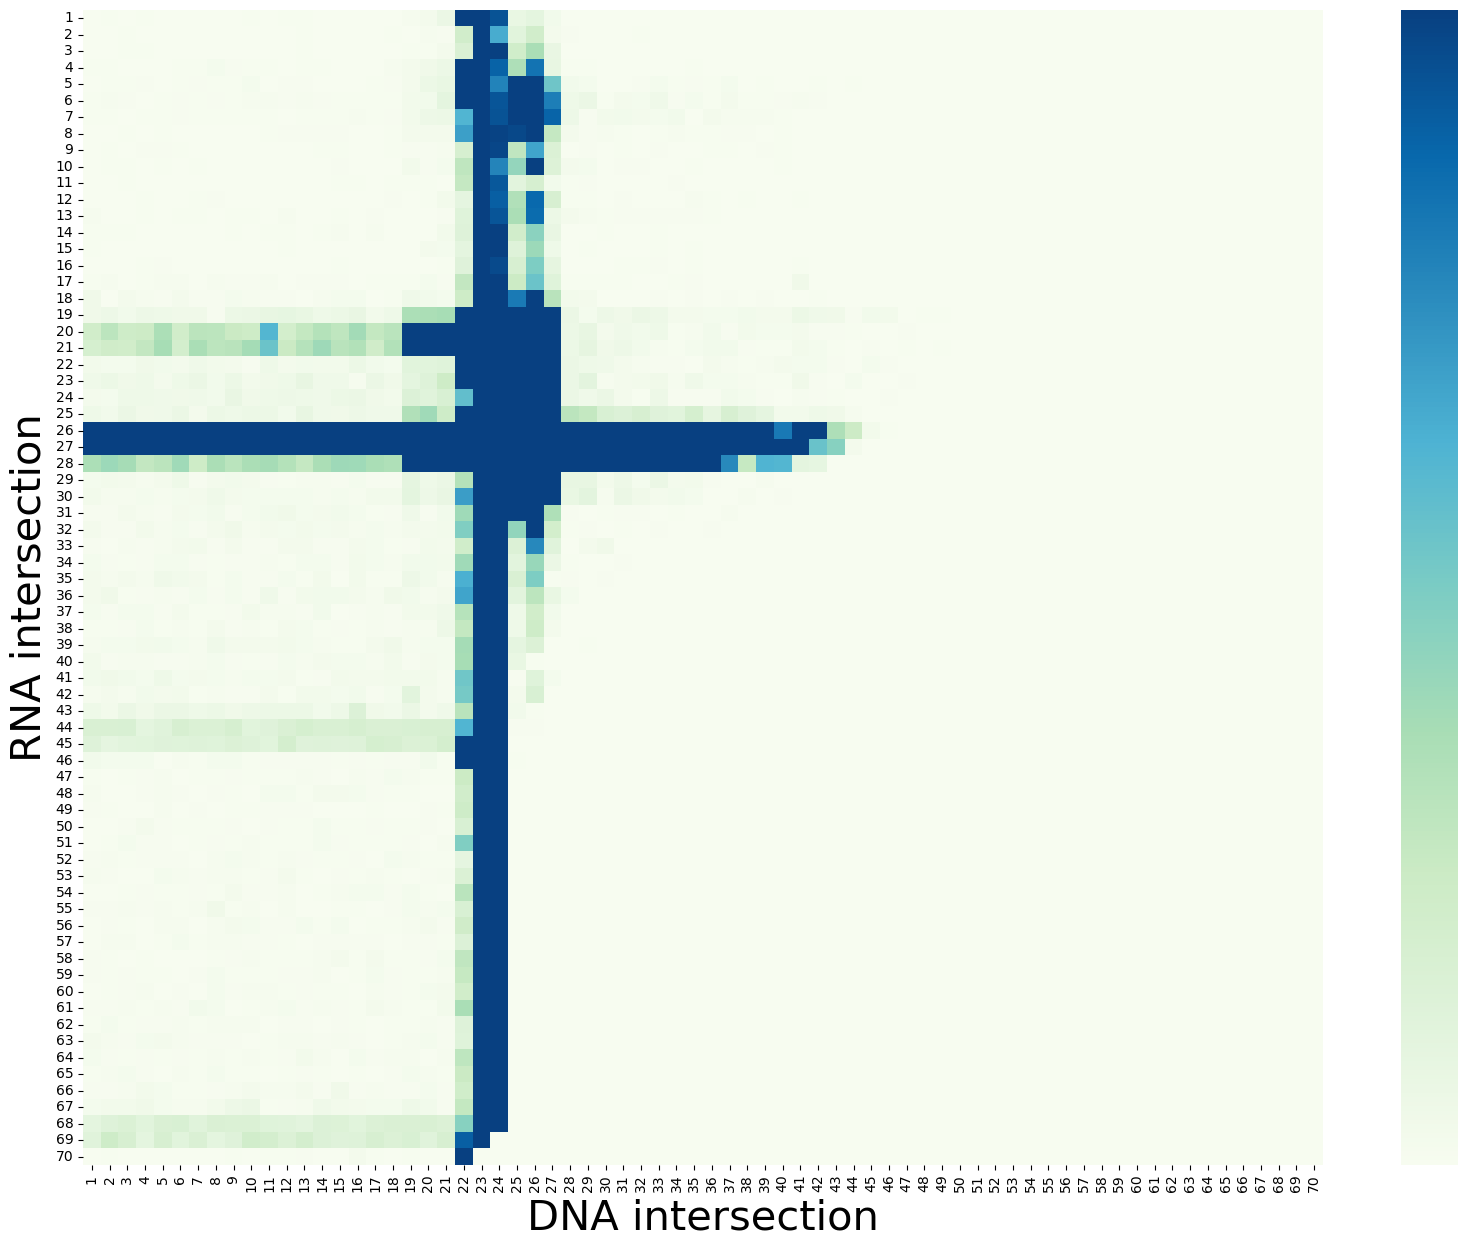

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,70
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,1,4,2,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,2,0,1,2,1,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2,2,3,6,4,1,1,2,3,5,...,0,0,0,0,0,0,0,0,0,0
67,4,6,6,8,4,3,3,6,11,13,...,0,0,0,0,0,0,0,0,0,0
68,21,28,32,24,33,35,25,33,32,32,...,0,0,0,0,0,0,0,0,0,0
69,25,47,37,21,36,24,33,21,27,43,...,0,0,0,0,0,0,0,0,0,0


In [10]:
draw_heatmap_intersections("inters_sizes/RNA_WINDOW_100_DNA_WINDOW_2000.no_mRNA.tsv")

Предположу, что лучше всего оставлять те контакты, у которых и по РНК-, и по ДНК-частям пересечение больше 19 nt.

## Фильтрация

In [3]:
def calc_desat(fd):
    df = pd.read_table(fd, header=None).rename(columns={0:"DNA_int", 1:"RNA_int"})
    total = df.shape[0]
    desat = df.query("DNA_int >= 19 & RNA_int >= 19").shape[0]
    
    df = pd.read_table("no_mRNA/" + fd, header=None).rename(columns={0:"DNA_int", 1:"RNA_int"})
    total_npc = df.shape[0]
    desat_npc = df.query("DNA_int >= 19 & RNA_int >= 19").shape[0]
    
    return {"w_mRNA": desat/total, 
            "no_mRNA": desat_npc/total_npc,
            "mRNA_triads_ratio": 1 - total_npc / total,
            "N_triads_w_mRNA": int(total)}

In [4]:
dt = {}
for file in glob.glob("*tsv"):
     dt[file.strip(".tsv")] = calc_desat(file)

pd.DataFrame.from_dict(dt).transpose().iloc[[6, 7, 4, 8, 5, 2, 0, 3, 1], :]

,w_mRNA,no_mRNA,mRNA_triads_ratio,N_triads_w_mRNA
RNA_WINDOW_0_DNA_WINDOW_0,0.903023,0.911388,0.446300,516874.0
RNA_WINDOW_0_DNA_WINDOW_1000,0.961264,0.969930,0.485264,2248890.0
RNA_WINDOW_0_DNA_WINDOW_2000,0.967142,0.975582,0.446653,4034992.0
RNA_WINDOW_50_DNA_WINDOW_0,0.897101,0.898846,0.519851,455804.0
RNA_WINDOW_50_DNA_WINDOW_1000,0.958897,0.963723,0.449651,2441988.0
RNA_WINDOW_50_DNA_WINDOW_2000,0.965132,0.969912,0.451655,4164760.0
RNA_WINDOW_100_DNA_WINDOW_0,0.906540,0.914414,0.459120,545173.0
RNA_WINDOW_100_DNA_WINDOW_1000,0.964580,0.972778,0.457548,2495937.0
RNA_WINDOW_100_DNA_WINDOW_2000,0.970768,0.978806,0.459577,4256230.0


## Количество триад и расширение ДНК-пиков и РНК-пиков

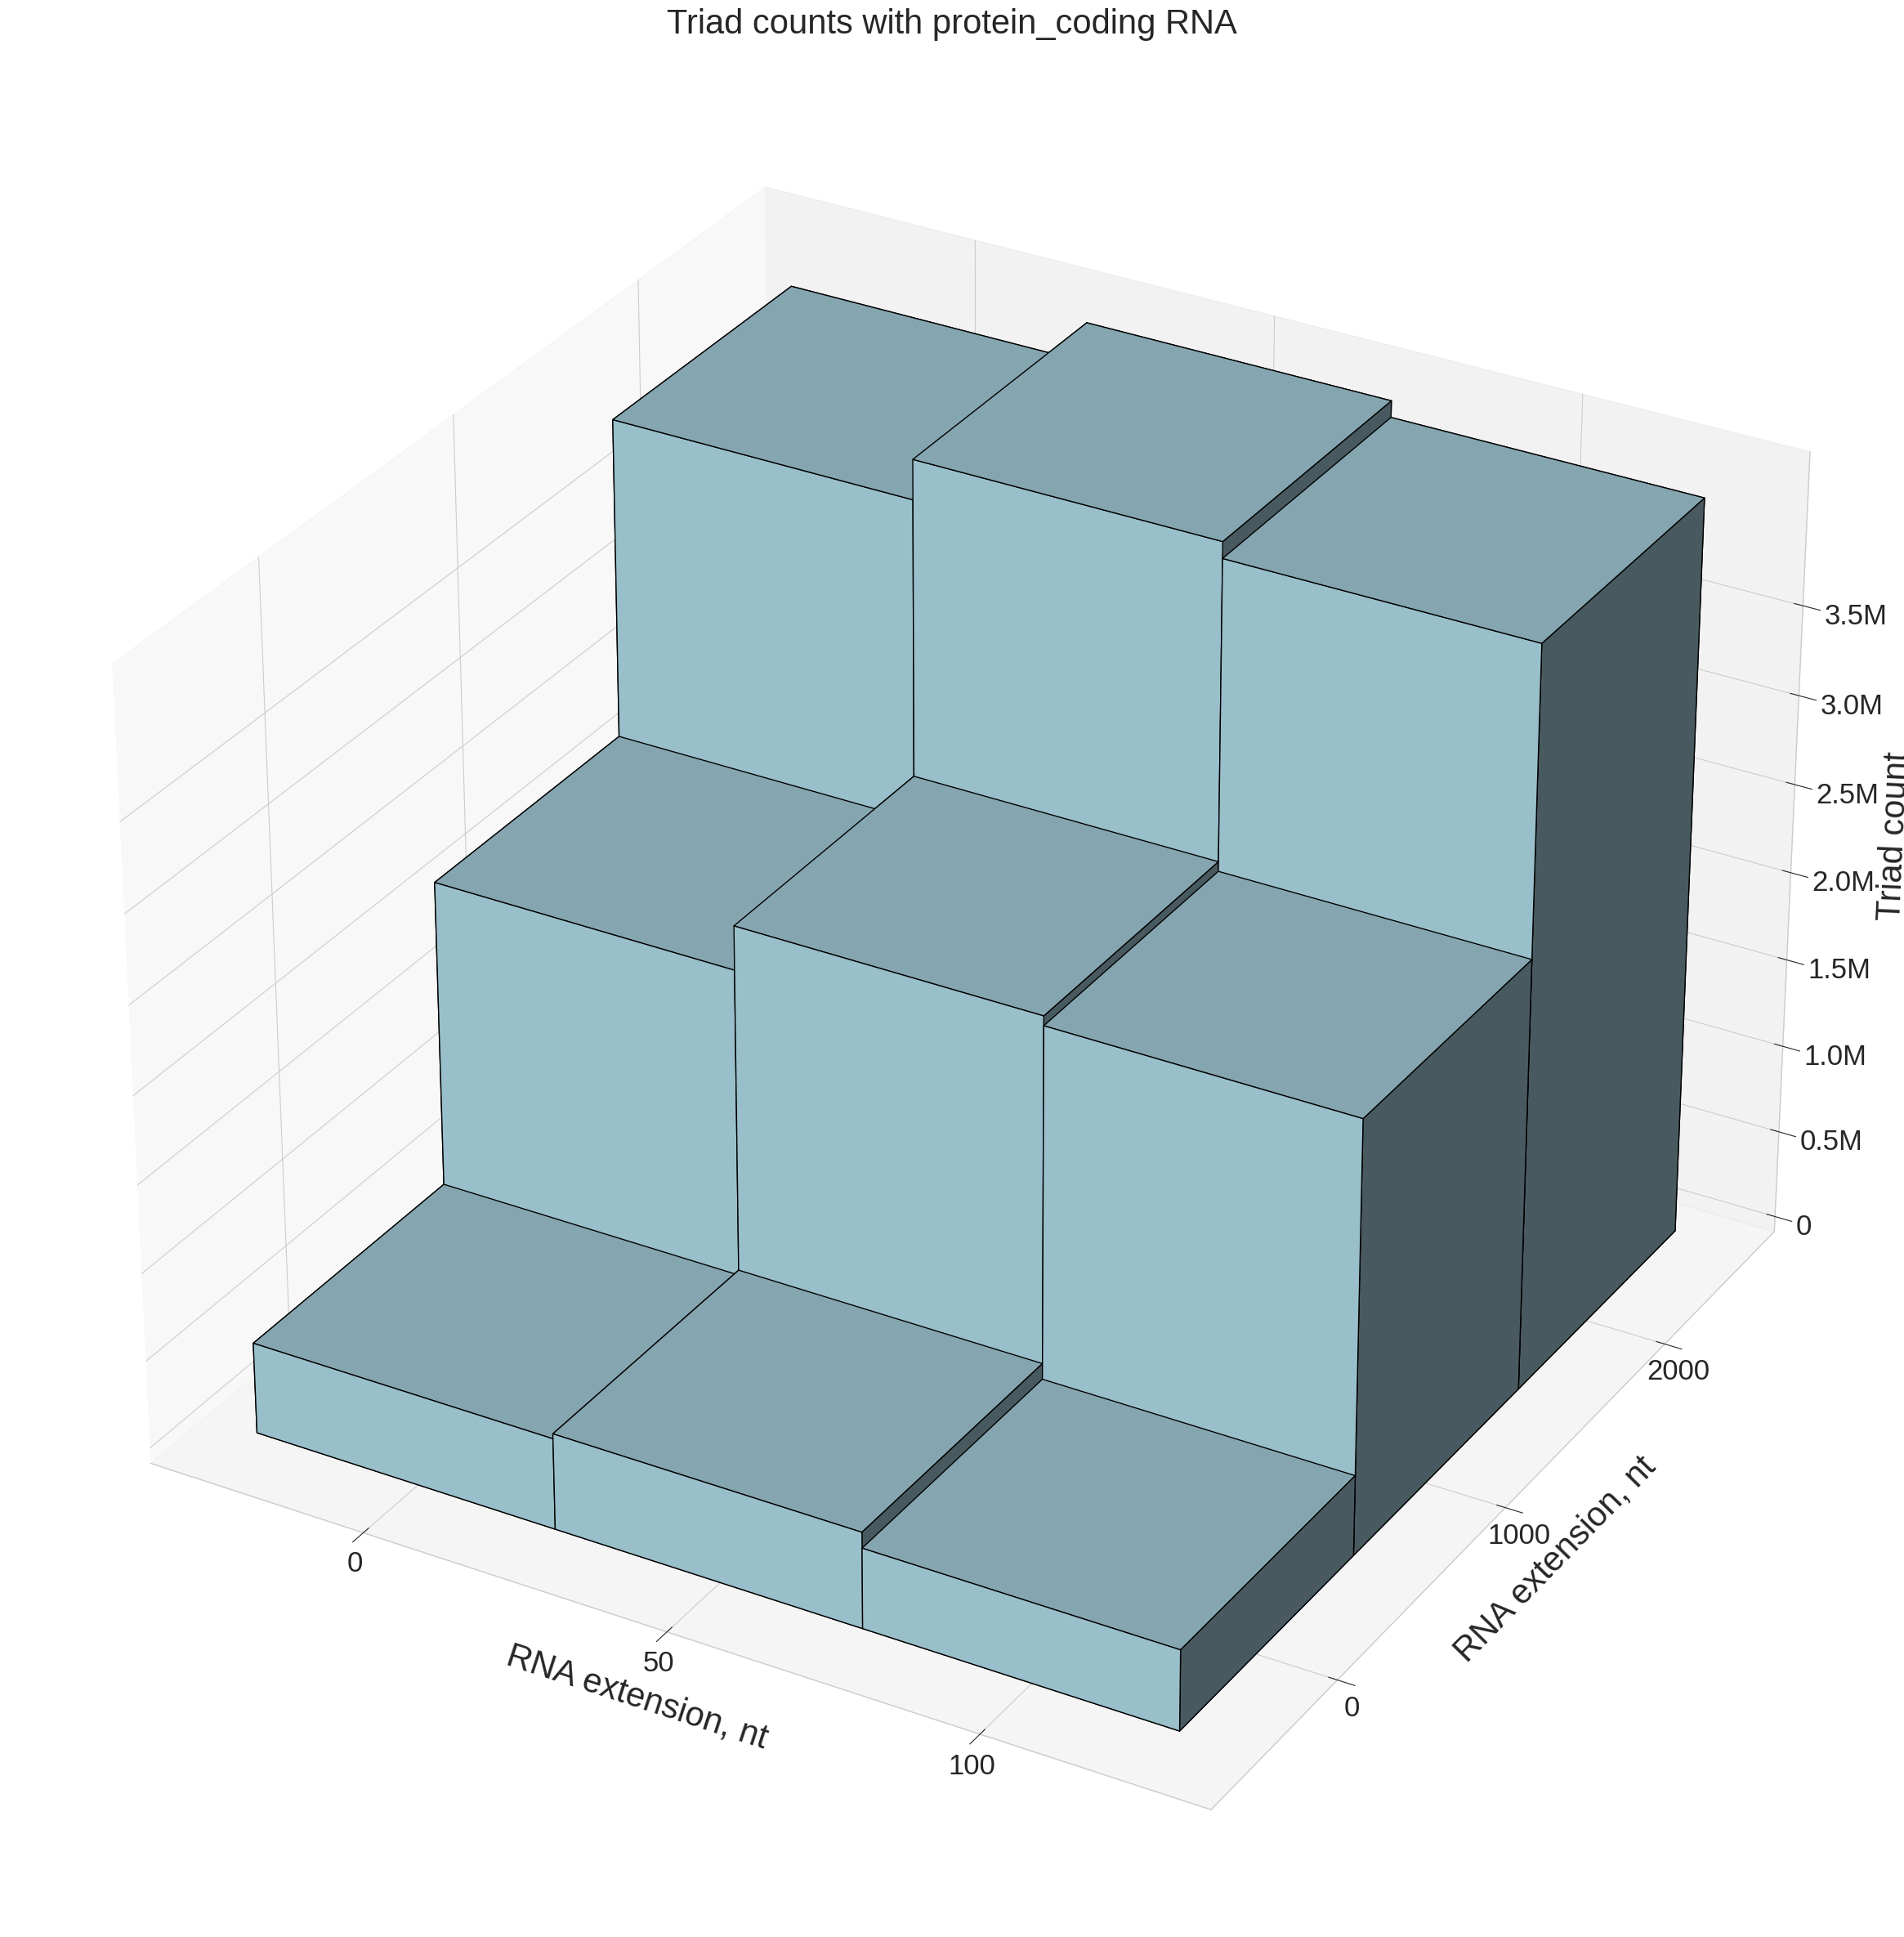

In [17]:
rna_values = [0, 0, 0, 50, 50, 50, 100, 100, 100]
dna_values = [0, 1000, 2000, 0, 1000, 2000, 0, 1000, 2000]
count_values = np.array([516874, 2248890, 4034992, 545173, 2495937, 4256230, 455804, 2441988, 4164760])

x_labels, x_pos = np.unique(rna_values, return_inverse=True)
y_labels, y_pos = np.unique(dna_values, return_inverse=True)

plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x_pos-0.5, y_pos-0.5, np.zeros_like(count_values), 1, 1, count_values, color="lightblue", ec="black")
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_zticks(range(0, 4_000_000, 500_000))
ax.set_zticklabels([0] + [str(num / 1_000_000) + "M" for num in range(500_000, 4_000_000, 500_000)], 
                   horizontalalignment='left')
ax.tick_params(axis='both', which='both', labelsize=25)

ax.set_title("Triad counts with protein_coding RNA", fontsize=30)
ax.set_xlabel('RNA extension, nt', fontsize=30, labelpad=20)
ax.set_ylabel('RNA extension, nt', fontsize=30, labelpad=20)
ax.set_zlabel('Triad count', fontsize=30, labelpad=35)
plt.show()

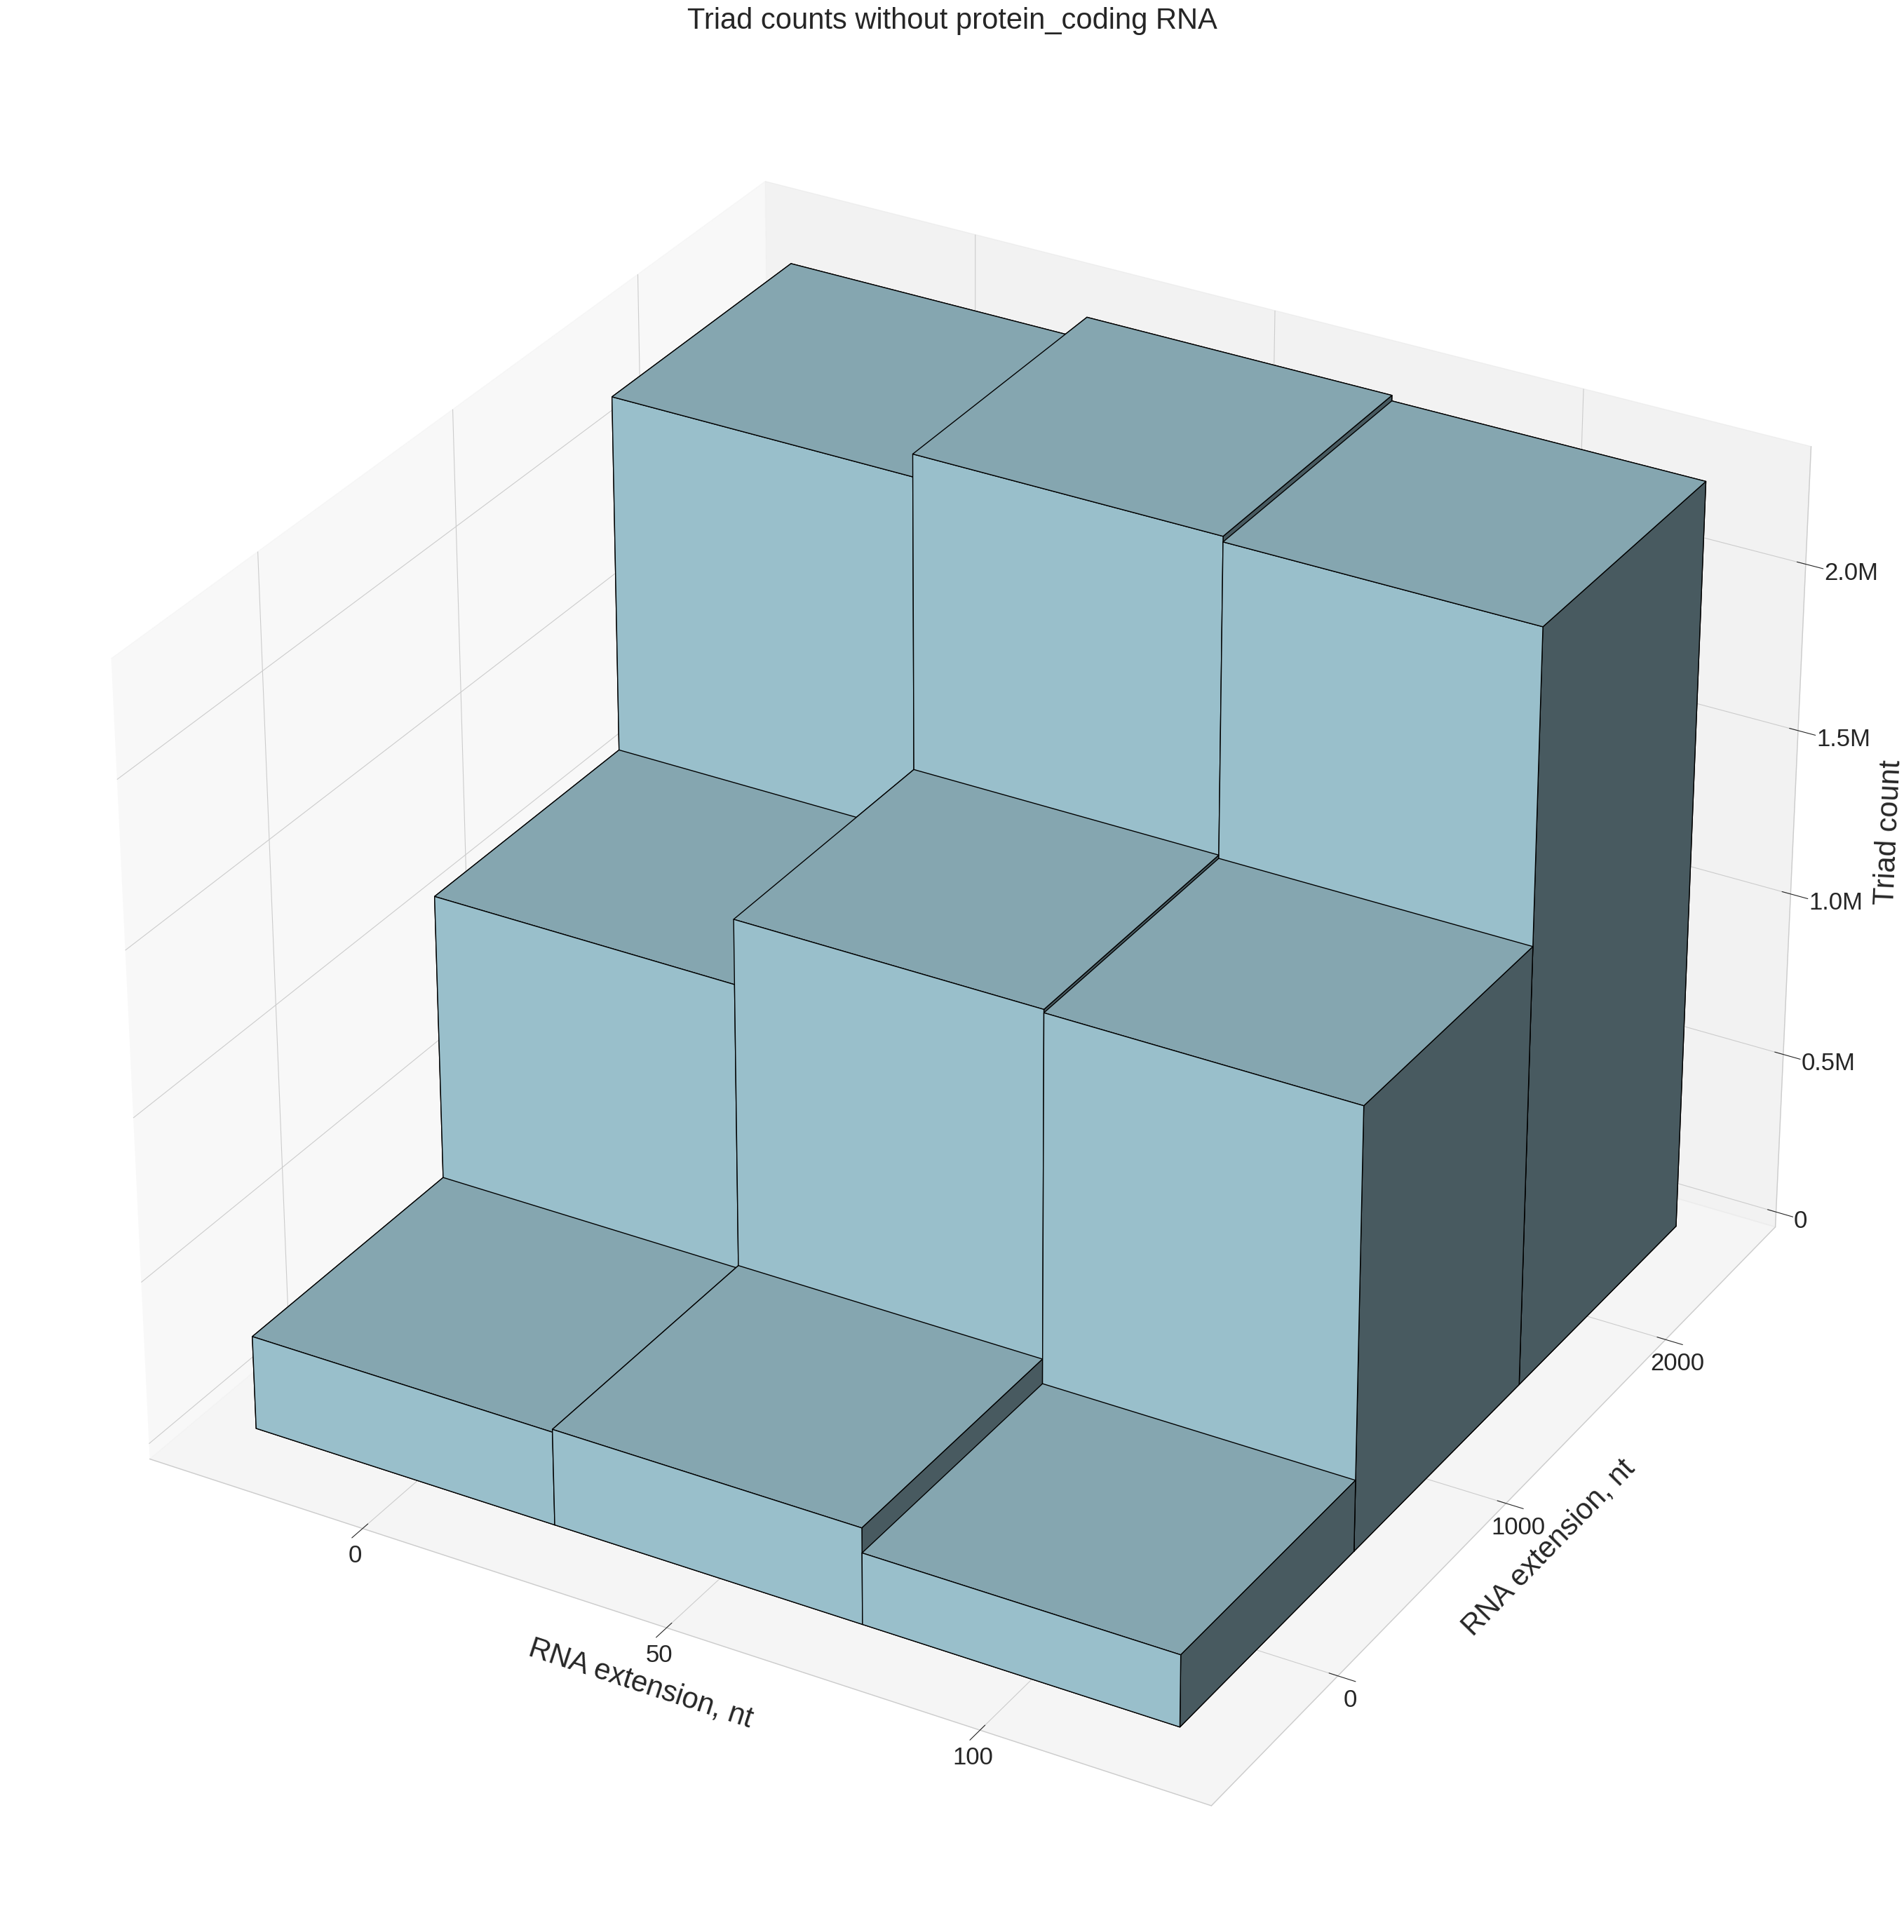

In [18]:
rna_values = [0, 0, 0, 50, 50, 50, 100, 100, 100]
dna_values = [0, 1000, 2000, 0, 1000, 2000, 0, 1000, 2000]
count_values = np.array([286193, 1157585, 2232752, 294873, 1353927, 2300163, 218854, 1343945, 2283725])

x_labels, x_pos = np.unique(rna_values, return_inverse=True)
y_labels, y_pos = np.unique(dna_values, return_inverse=True)

plt.style.use("seaborn-v0_8-whitegrid")
fig = plt.figure(figsize=(35, 35))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x_pos-0.5, y_pos-0.5, np.zeros_like(count_values), 1, 1, count_values, color="lightblue", ec="black")
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_zticks(range(0, 2_500_000, 500_000))
ax.set_zticklabels([0] + [str(num / 1_000_000) + "M" for num in range(500_000, 2_500_000, 500_000)], 
                   horizontalalignment='left')
ax.tick_params(axis='both', which='both', labelsize=25)

ax.set_title("Triad counts without protein_coding RNA", fontsize=30)
ax.set_xlabel('RNA extension, nt', fontsize=30, labelpad=20)
ax.set_ylabel('RNA extension, nt', fontsize=30, labelpad=20)
ax.set_zlabel('Triad count', fontsize=30, labelpad=40)
plt.show()

## Количество триад и расширение ДНК-пиков и РНК-пиков в виде хитмапа

Text(163.08333333333334, 0.5, 'RNA extension, nt')

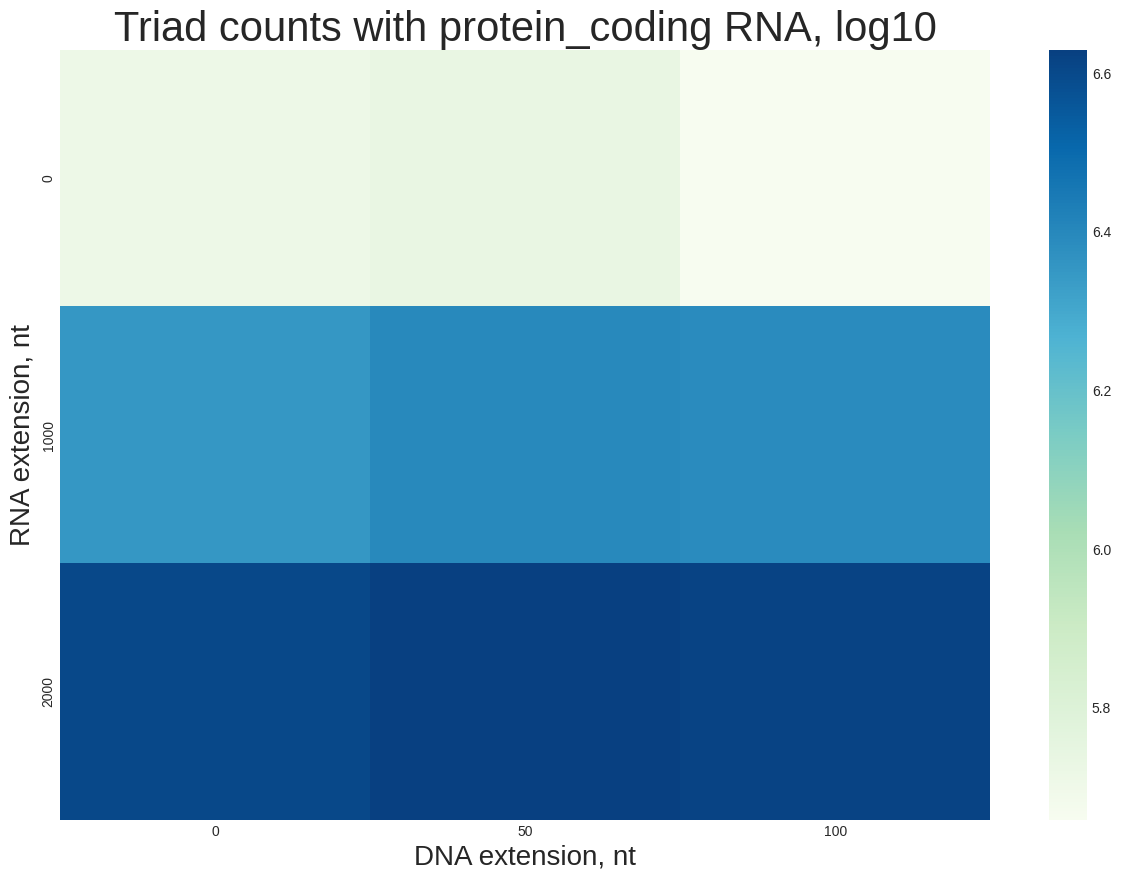

In [19]:
rna_values = [0, 0, 0, 50, 50, 50, 100, 100, 100]
dna_values = [0, 1000, 2000, 0, 1000, 2000, 0, 1000, 2000]
count_values = np.array([516874, 2248890, 4034992, 545173, 2495937, 4256230, 455804, 2441988, 4164760])

dt = {k : {0: 0, 1000: 0, 2000: 0} for k in rna_values}
for el in zip(rna_values, dna_values, count_values):
    dt[el[0]][el[1]] = np.log10(el[2])

df = pd.DataFrame.from_dict(dt)

plt.figure(figsize=(15, 10))
sns.heatmap(df, cmap="GnBu")
plt.title("Triad counts with protein_coding RNA, log10", fontsize=30)
plt.xlabel('DNA extension, nt', fontsize = 20)
plt.ylabel('RNA extension, nt', fontsize = 20)

Text(163.08333333333334, 0.5, 'RNA extension, nt')

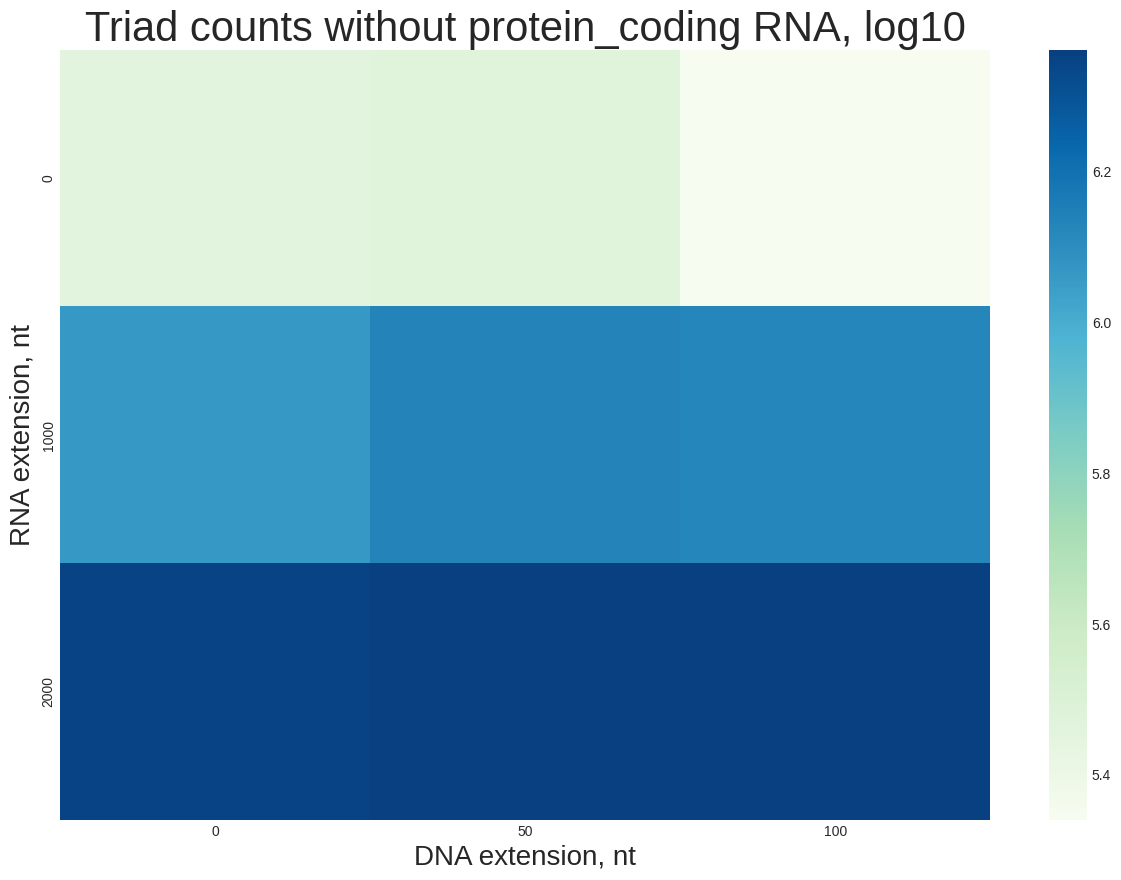

In [20]:
rna_values = [0, 0, 0, 50, 50, 50, 100, 100, 100]
dna_values = [0, 1000, 2000, 0, 1000, 2000, 0, 1000, 2000]
count_values = np.array([286193, 1157585, 2232752, 294873, 1353927, 2300163, 218854, 1343945, 2283725])

dt = {k : {0: 0, 1000: 0, 2000: 0} for k in rna_values}
for el in zip(rna_values, dna_values, count_values):
    dt[el[0]][el[1]] = np.log10(el[2])

df = pd.DataFrame.from_dict(dt)

plt.figure(figsize=(15, 10))
sns.heatmap(df, cmap="GnBu")
plt.title("Triad counts without protein_coding RNA, log10", fontsize=30)
plt.xlabel('DNA extension, nt', fontsize = 20)
plt.ylabel('RNA extension, nt', fontsize = 20)